In [1]:
import pandas as pd
def load_data(path, nrows=None):
    data =pd.read_csv(path, nrows=nrows)
    return data

def preprocess_data(data):
    columns_to_encode= data.select_dtypes(include=['object']).columns
    for col in columns_to_encode:
        if data[col].nunique()>100:
            data=data.drop(columns=[col])
    data=data.dropna()
    data=pd.get_dummies(data)
    print("data preview after pre-processing the data:\n",data.head())
    print("data col preview after pre-processing the data:\n",data.columns)
    return data

if __name__ == "__main__":
    raw_data_path = r"D:\\FraudDetection\\Fraud.csv"
    processed_data_path = r"D:\\FraudDetection\\processeddata.csv" 
    data= load_data(raw_data_path)
    data= preprocess_data(data)
    data.to_csv(processed_data_path, index=False)
    print("preprocessing complete. Processed data is saved to:", processed_data_path)

data preview after pre-processing the data:
    step    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0     1   9839.64       170136.0       160296.36             0.0   
1     1   1864.28        21249.0        19384.72             0.0   
2     1    181.00          181.0            0.00             0.0   
3     1    181.00          181.0            0.00         21182.0   
4     1  11668.14        41554.0        29885.86             0.0   

   newbalanceDest  isFraud  isFlaggedFraud  type_CASH_IN  type_CASH_OUT  \
0             0.0        0               0         False          False   
1             0.0        0               0         False          False   
2             0.0        1               0         False          False   
3             0.0        1               0         False           True   
4             0.0        0               0         False          False   

   type_DEBIT  type_PAYMENT  type_TRANSFER  
0       False          True          False  
1    

In [13]:
import joblib
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

def load_data(path):
    data = pd.read_csv(path)
    return data

In [15]:
def split_data(data):
    X = data.drop(['isFraud', 'isFlaggedFraud'], axis=1)  # Drop target and flagged columns
    y = data['isFraud']  # Target variable (isFraud)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

# Training the Random Forest model
def train_model(X_train, y_train):
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    return model

In [17]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    return accuracy, cm, roc_auc

In [21]:
if __name__ == "__main__":
    processed_data_path = r"D:\\FraudDetection\\processeddata.csv"
    data = load_data(processed_data_path)
    X_train, X_test, y_train, y_test = split_data(data)
    

In [27]:
    model = train_model(X_train, y_train)
    accuracy, cm, roc_auc = evaluate_model(model, X_test, y_test)

In [29]:
    print(f"Accuracy: {accuracy}")
    print(f"Confusion Matrix: \n{cm}")
    print(f"ROC AUC Score: {roc_auc}")
    joblib.dump(model,'random_forest_model.pkl')
    joblib.dump(X_train.columns,'training_columns.pkl')

Accuracy: 0.9997304569501243
Confusion Matrix: 
[[1270882      22]
 [    321    1299]]
ROC AUC Score: 0.90091727066951


['training_columns.pkl']

In [31]:
import joblib
import pandas as pd

model=joblib.load('random_forest_model.pkl')  # load the model from the file

def preprocess_new_data(new_data, training_columns):
    new_data=new_data.dropna()
    new_data=pd.get_dummies(new_data)

    missing_cols =set(training_columns) - set(new_data.columns)  #checks if 
    for col in missing_cols:
        new_data[col]=0
    new_data= new_data[training_columns] #reordering coloumns
    return new_data    

def make_predictions(new_data):
    training_columns = joblib.load('training_columns.pkl')
    new_data = preprocess_new_data(new_data, training_columns)
    predictions = model.predict(new_data)
    return predictions

if __name__ == "__main__":
    new_patient_data_path = r"D:\\FraudDetection\\processeddata.csv"
    new_patient_data = pd.read_csv(new_patient_data_path)
    
    predictions = make_predictions(new_patient_data)
    new_patient_data['predictions']= predictions
    predictions_output_path=r"D:\\FraudDetection\\predictions_output.csv"
    new_patient_data.to_csv(predictions_output_path, index=False)
    
    print(f"Predictions saved to {predictions_output_path}")

Predictions saved to D:\\FraudDetection\\predictions_output.csv


In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def load_data(path):
    data = pd.read_csv(path)
    return data

In [37]:
def preprocess_data(data):
    columns_to_encode = data.select_dtypes(include=['object']).columns
    for col in columns_to_encode:
        if data[col].nunique() > 100:
            data = data.drop(columns=[col])
    data = data.dropna()
    data = pd.get_dummies(data)
    print("Data preview after pre-processing the data:\n", data.head())
    print("Data columns after pre-processing the data:\n", data.columns)
    return data

Data preview after pre-processing the data:
    step    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0     1   9839.64       170136.0       160296.36             0.0   
1     1   1864.28        21249.0        19384.72             0.0   
2     1    181.00          181.0            0.00             0.0   
3     1    181.00          181.0            0.00         21182.0   
4     1  11668.14        41554.0        29885.86             0.0   

   newbalanceDest  isFraud  isFlaggedFraud  type_CASH_IN  type_CASH_OUT  \
0             0.0        0               0         False          False   
1             0.0        0               0         False          False   
2             0.0        1               0         False          False   
3             0.0        1               0         False           True   
4             0.0        0               0         False          False   

   type_DEBIT  type_PAYMENT  type_TRANSFER  
0       False          True          False  
1    

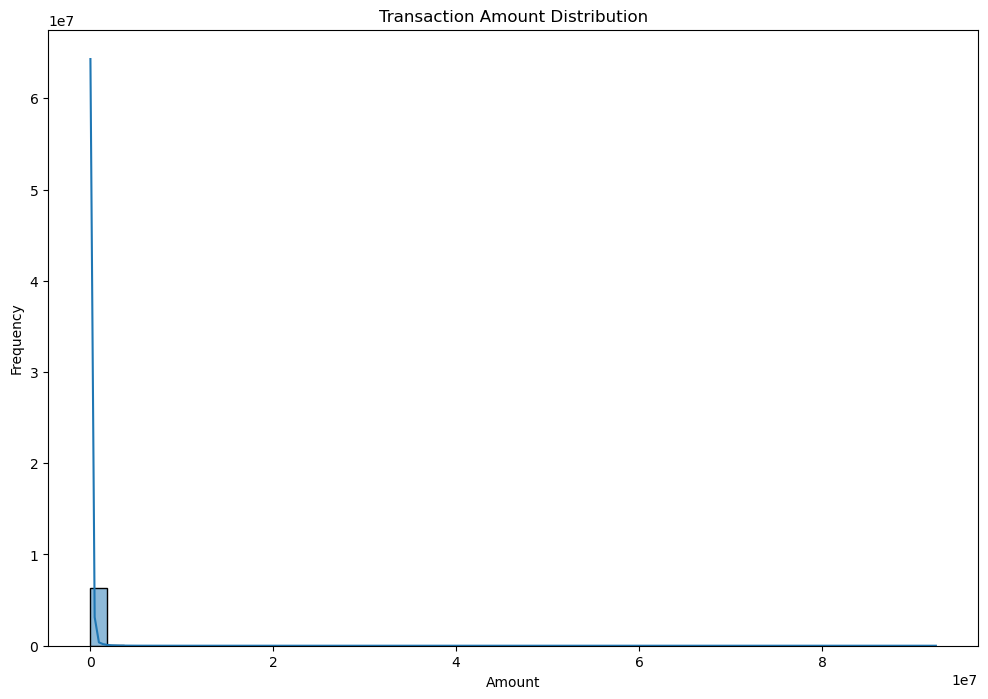

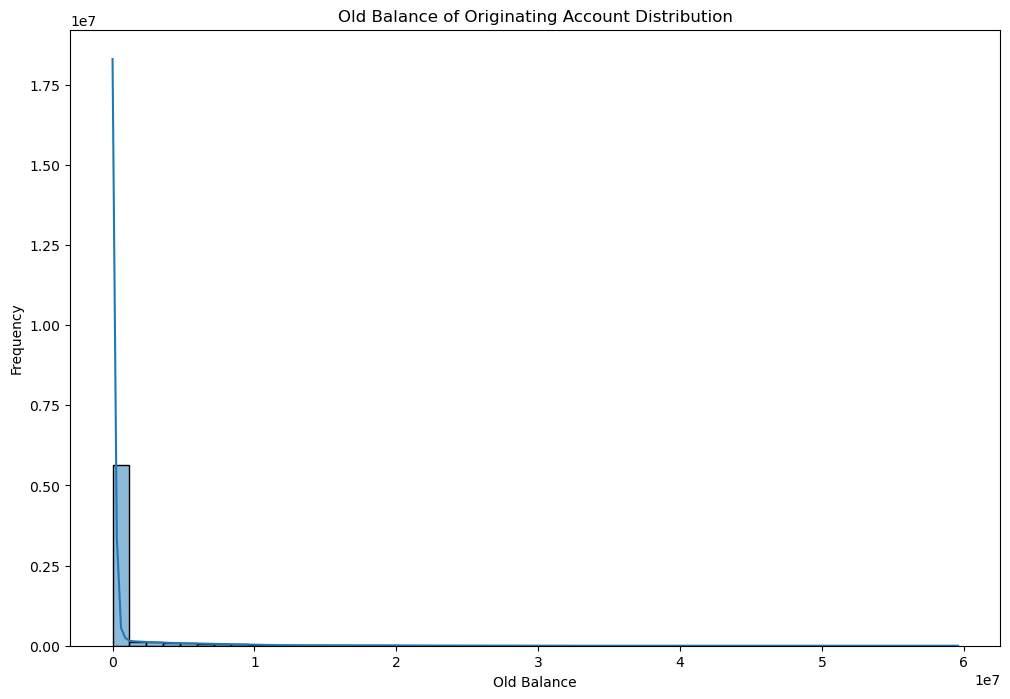

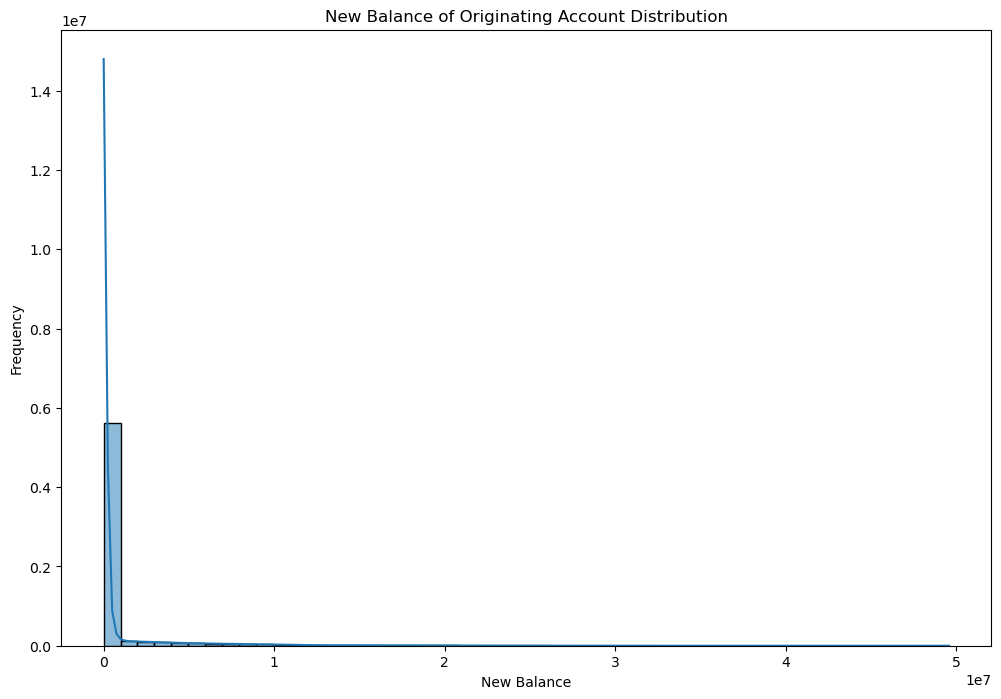

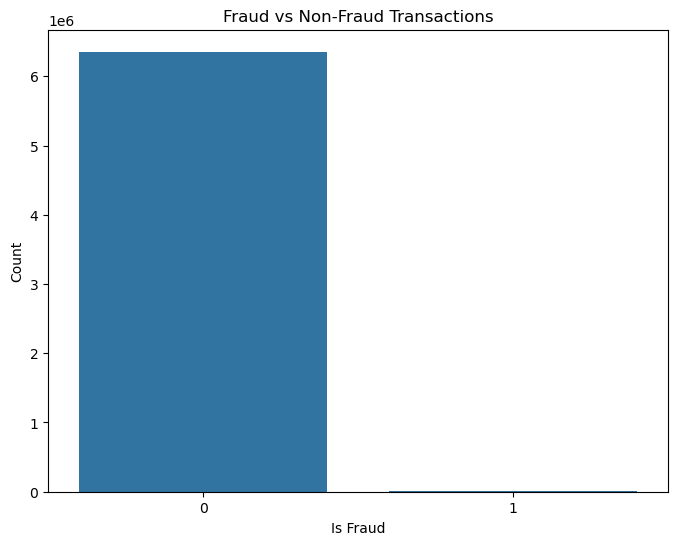

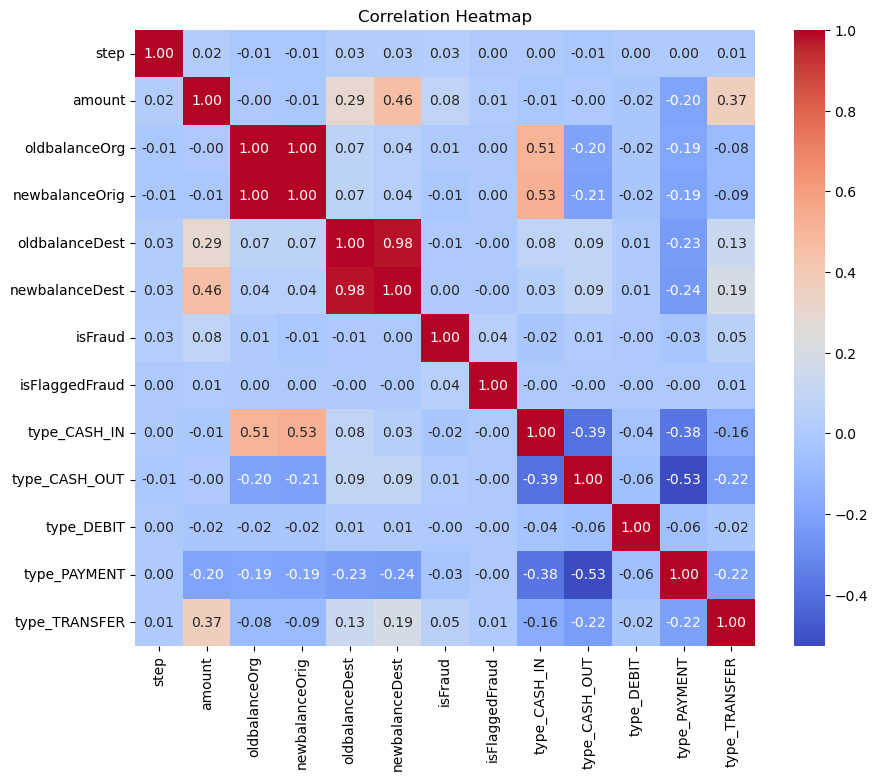

In [39]:
# Plot distrubution for feature and fraud andd also figures
def plot_feature_distribution(data):
    plt.figure(figsize=(12, 8))
    sns.histplot(data['amount'], bins=50, kde=True)
    plt.title('Transaction Amount Distribution')
    plt.xlabel('Amount')
    plt.ylabel('Frequency')
    plt.show()

    plt.figure(figsize=(12, 8))
    sns.histplot(data['oldbalanceOrg'], bins=50, kde=True)
    plt.title('Old Balance of Originating Account Distribution')
    plt.xlabel('Old Balance')
    plt.ylabel('Frequency')
    plt.show()

    plt.figure(figsize=(12, 8))
    sns.histplot(data['newbalanceOrig'], bins=50, kde=True)
    plt.title('New Balance of Originating Account Distribution')
    plt.xlabel('New Balance')
    plt.ylabel('Frequency')
    plt.show()

def plot_fraud_distribution(data):
    plt.figure(figsize=(8, 6))
    sns.countplot(x='isFraud', data=data)
    plt.title('Fraud vs Non-Fraud Transactions')
    plt.xlabel('Is Fraud')
    plt.ylabel('Count')
    plt.show()

# Plot correlation heatmap
def plot_correlation_heatmap(data):
    plt.figure(figsize=(10, 8))
    corr = data.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap')
    plt.show()
if __name__ == "__main__":
    raw_data_path = r"D:\\FraudDetection\\Fraud.csv"  # Replace with your path
    data = load_data(raw_data_path)
    data = preprocess_data(data)

    # Visualize feature distributions
    plot_feature_distribution(data)

    # Visualize fraud distribution
    plot_fraud_distribution(data)

    # Plot correlation heatmap
    plot_correlation_heatmap(data)

In [ ]:
1.Data cleaning, including missing values, outliers, and multi-collinearity.

ANS:To deal with missing variables, the null values were dropped during cleaning. This will ensure that the model works on complete data alone;
thus, it will avoid neither errors nor biases during training. Further, one-hot encoding was used in the conversion of categorical variables to a
format that machine learning can work with. 
The columns like nameOrig and nameDest were avoided in pre-processing as they had the potential to be high cardinality features.

2. Layout your fraudulent activity detection model.

ANS:Random Forest Classifier was used for fraud detection because it's a robust model and does handle both categorical and numerical data.
So, to predict if a transaction is fraudulent or not, the model was trained to make predictions on the 'isFraud' column. In the work,
the Random Forest Method was chosen, since it is an ensemble method; hence, it will combine many decision trees in order to increase the accuracy and
reduce overfitting.80% of the dataset was used to train the model, while 20% thereof was left for testing purposes by means of standard measures such 
as accuracy, confusion matrix, and ROC AUC score. It is going to serve effectively to identify patterns between features describing transactions-meaning
amounts and balances-and if fraud took place.

3. How did you select variables that would make it into this model?

ANS:Selection of variables was based on relevance to the fraud detection effort. Variables like amount, oldbalanceOrg, newbalanceOrig, 
oldbalanceDest, and newbalanceDest remained, as they provide crucial information about flow in finance transactions, which plays a very 
vital role in determining whether an activity is fraudulent. Categorical variables like the type were encoded into a one-hot format to 
be presented to machine learning models.Other columns, such as nameOrig and nameDest, were removed because of too many unique values that
do not seem predictive at all with regard to fraud detection. isFraud could be directly related to the business objective at hand and was
the target variable for prediction.

4. Demonstrate the model performance with the best set of tools.

ANS: The performance measures of the Random Forest model are accuracy, the confusion matrix, and the ROC AUC score.
Accuracy gives the frequency of a model rightly predicting fraudulent and non-fraudulent transactions.
The confusion matrix gives the elaborative insight that depicts the number of correct and incorrect predictions, showing true positives (TP)
false positives (FP), true negatives (TN), and false negatives (FN).
It is the score of ROC AUC, which is the ability of a model to tell between fraud and non-fraud cases. 
It would be high, therefore showing better performance by identifying fraudulent transactions.
These metrics taken together reflect the effectiveness of this model in fraud detection.

5. Which variables predict fraudulent customers?
ANS:In this dataset, some factors that controlled fraudulent behavior included amount, oldbalanceOrg, and a type of transaction,
which can be CASH-IN, CASH-OUT etc.Large amounts of money involved in transactions, too large of a difference between old and
new balances, and some kinds of transactions, such as CASH-OUT and TRANSFER, were highly suggestive of fraud. More specifically,
fraud patterns tended to emanate particularly where money would rapidly move in large amounts from one account to another. 
Irregularities were also captured in the flows of transactions, such as large changes in balances that do not make sense against normal behavior. 
These are those things which become very relevant in flagging suspicious activities for further scrutiny.

6. Do these factors make sense? If yes, how? If not, how not?
ANS:Of course, those variables make much sense when it comes to financial fraud detection. Large money transactions or
even faster transfers between accounts are generally a starting point for fraudulent transactions.The balance shift needs to be
much different from usual for an account for fraudsters to empty the account using first transfers and then withdrawals;
hence, amount, oldbalanceOrg, and newbalanceOrig are some of the important variables here. 
It is further supported by transaction types like CASH-OUT or TRANSFER, which are precisely the ways fraudsters would go 
about taking money from an account. The listed factors indeed support real-world patterns of fraud and logically provide a basis on
which one could predict fraudulent transactions.

7. What prevention shall be considered when updating the company's infrastructure?
ANS:This will help reduce fraud risks since it involves multiple factors of authentication at every large or unusual transaction.
Real-time monitoring flags suspected activities. Advanced analytics using machine learning models, just like this project,
should be inculcated within the infrastructures of the company for recognition of patterns of fraud quite early. Secondly
the fraud may be prevented by transactions limits and alerts on rapid or large changes in account balances.
It would also require periodic auditing of transaction logs and algorithms for the detection of anomalies, maintaining the integrity of the financial system to ensure that the infrastructures move with the emerging tactics of fraud.

8. Assuming these steps have or would have been taken, how would you go about knowing whether they work?

ANS:This again would be confirmed through continuous monitoring of certain key indicators of the success or effectiveness of those preventive measures that may include a fraud transaction rate, the number of flagged but otherwise legitimate transactions,
and customer complaints against the blocking of their transactions. The validation of the fraud detection model performance should be continuously tested on a regular basis against new data. Success would be the decrease in fraud cases while the model's accuracy is high at the same time. Besides, positive feedback by regulators from the financial domain,
rise in customer satisfaction, and decrease in financial losses caused by fraud form a critical indication that changes to the infrastructure are effective.